In [9]:
import pandas as pd
import numpy as np 

In [10]:
original_data=pd.read_csv(
	"Data/adult.csv",
	names=[

"Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital Status",
"Occupation", "Relationship", "Race", "Gender", "Capital Gain", "Capital Loss",
"Hours per week", "Country", "Target"],
sep=r'\s*, \s*',
engine='python',
na_values="?")

In [11]:
original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [15]:
fig=plt.figure(figsize=(20,20))
cols=3
rows=math.ceil(float(original_data.shape[1])/cols)

<Figure size 1440x1440 with 0 Axes>

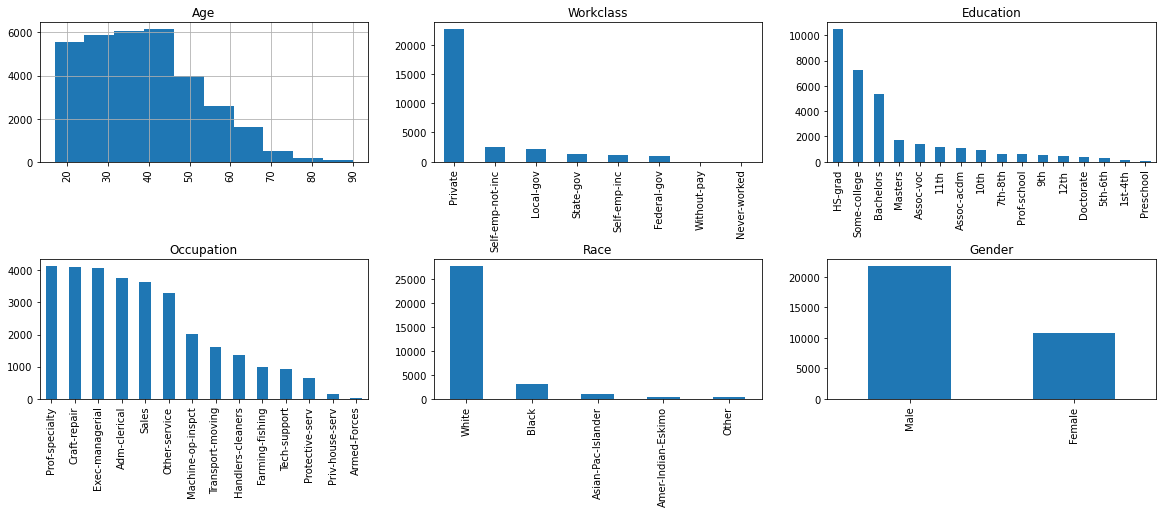

In [28]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

fig=plt.figure(figsize=(20,20))
cols=3
rows=math.ceil(float(original_data.shape[1])/cols)

for i, column in enumerate(['Age','Workclass', 'Education', 'Occupation', 'Race', 'Gender']):
    ax= fig.add_subplot(rows, cols, i+ 1)
    ax.set_title(column)
    if original_data.dtypes[column]==np.object:
        original_data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        original_data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [31]:
import sklearn.preprocessing as preprocessing
le= preprocessing.LabelEncoder()
original_data['Occupation']=le.fit_transform(original_data['Occupation'].astype(str))

In [32]:
original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,13,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,2,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,2,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,6,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
original_data['Target']=le.fit_transform(original_data['Target'].astype(str))
original_data.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,9,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,3,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,13,Wife,White,Female,15024,0,40,United-States,1


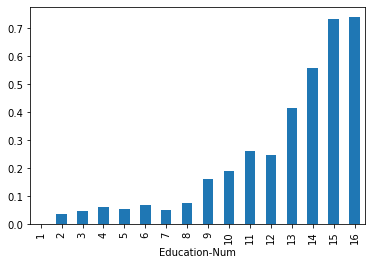

In [36]:
original_data.groupby('Education-Num').Target.mean().plot(kind='bar')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
x=original_data[['Education-Num','Occupation']]
y=original_data['Target']
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=0)

In [43]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train, y_train)
score= classifier.score(x_test, y_test)

In [44]:
print(score)

0.7844311377245509

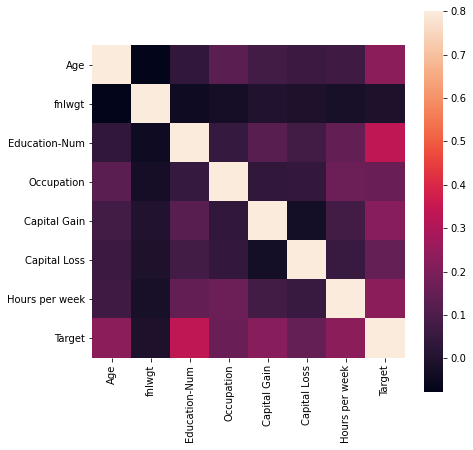

In [45]:
import seaborn as sns
corrmat = original_data.corr()
f, ax = plt.subplots (figsize=(7, 7))
sns.heatmap(corrmat, vmax=.8, square=True)

plt.show()

In [48]:
original_data[ 'Race'] = le.fit_transform(original_data[ 'Race'].astype(str))
original_data['Gender'] = le.fit_transform(original_data[ 'Gender'].astype(str))
original_data['Marital Status'] = le.fit_transform(original_data[ 'Marital Status'].astype(str))
original_data['Education']=le.fit_transform(original_data[ 'Education'].astype(str))

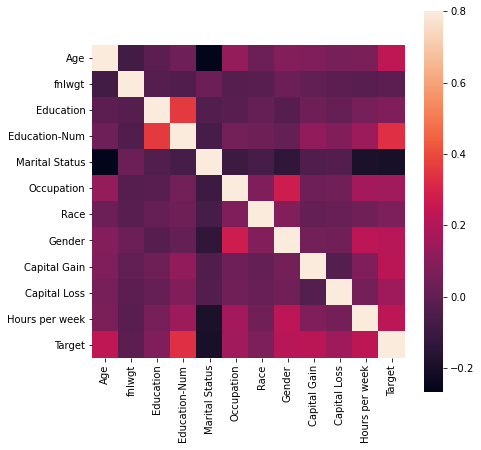

In [51]:
corrmat=original_data.corr()
f, ax = plt.subplots(figsize=(7, 7)) 
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

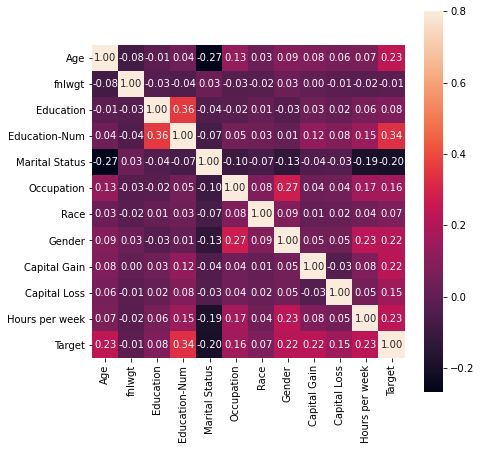

In [52]:
f, ax = plt.subplots(figsize=(7, 7)) 
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f')
plt.show()

In [64]:
X = original_data[['Education-Num', 'Occupation', 'Age', 'Gender']]
y = original_data[ 'Target']

In [70]:
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)
classifier = SVC()
classifier.fit(X_train, y_train)
score=classifier.score(x_test, y_test)
print(score)

0.7961001074773529


In [73]:
classifier=SVC (kernel='rbf', C=1.0)
classifier.fit (X_train,y_train)

score = classifier.score(x_test, y_test)
print (score)

0.7961001074773529
